<a href="https://colab.research.google.com/github/legendary-beast/Python-Programs/blob/main/house_price_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import pandas as pd


In [45]:
df = pd.read_csv("hdata.csv")
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='sqft_living', ylabel='price'>

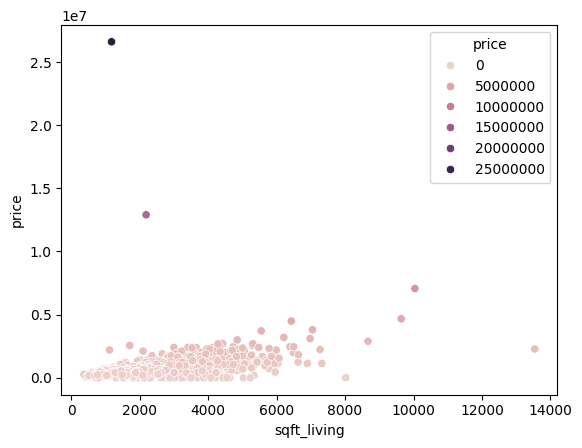

In [47]:
sns.scatterplot(x = df['sqft_living'],y = df['price'],hue=df['price'])

In [48]:
# sns.pairplot(df.drop(columns=['price']))


In [49]:
df.head(10)
df.drop_duplicates()
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [50]:
df = df.drop(columns=['street','statezip','date','city','country'])
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


In [77]:
from sklearn.model_selection import train_test_split
x = df.drop(['price'],axis=1)
y = df['price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=14)


In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
lr = LinearRegression()

In [80]:
lr.fit(x_train,y_train)

LinearRegression()

In [81]:
y_pred = lr.predict(x_test)
y_pred.shape,y_test.shape

((920,), (920,))

In [82]:
lr.score(x_test,y_test)

0.5853456096725416

In [83]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5853456096725416

In [84]:
lr.coef_

array([-5.97785164e+04,  4.95634818e+04,  1.70073201e+02, -9.35211554e-01,
        3.26532798e+04,  3.20958635e+05,  4.06503140e+04,  2.75000776e+04,
        9.60414484e+01,  7.40317532e+01, -2.35183069e+03,  4.10323762e+00])

In [85]:
features = df.drop(['price'],axis=1).columns
lr.coef_.shape, len(features)

((12,), 12)

In [86]:
df_coff = pd.DataFrame(lr.coef_,
                       index=features,
                       columns=['coefficients'])
df_coff

,coefficients
bedrooms,-59778.516366
bathrooms,49563.481801
sqft_living,170.073201
sqft_lot,-0.935212
floors,32653.279764
waterfront,320958.635177
view,40650.314049
condition,27500.077625
sqft_above,96.041448
sqft_basement,74.031753


In [87]:
lr.intercept_

4575658.49519949

In [88]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)
r2_score(y_test, y_pred_ridge)

0.5853247012136151

In [89]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)
r2_score(y_test, y_pred_lasso)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.007e+14, tolerance: 1.339e+11
  model = cd_fast.enet_coordinate_descent(


0.5853452099186919

In [90]:
from sklearn.model_selection import GridSearchCV

param_grid = {
               'fit_intercept': [True, False],
               'copy_X':[True, False],
               'fit_intercept': [True, False],
               'n_jobs': [5,20],
               'positive': [True, False]
               }

grid_search = GridSearchCV(LinearRegression(), param_grid, cv=50)
grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(x_test)
r2_score_best = r2_score(y_test, y_pred_best)

print("R2 score with best parameters:", r2_score_best)

Best parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': 5, 'positive': False}
Best score: 0.4362756758907053
R2 score with best parameters: 0.5853456096725416


In [91]:
lr = LinearRegression(copy_X= True, fit_intercept= True, n_jobs= 5, positive= False)
lr.fit(x_train,y_train)


LinearRegression(n_jobs=5)

In [92]:
lr.score(x_test,y_test)

0.5853456096725416

In [100]:
from sklearn.model_selection import train_test_split
x = df.drop(['price'],axis=1)
y = df['price']
score = []
for i in range(100):
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=i)
  lr = LinearRegression()
  lr.fit(x_train,y_train)
  score.append(lr.score(x_test,y_test))



In [101]:
score.index(max(score))
score[14]

0.5874771712935961